In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("Data.csv", low_memory=False)
print(df.shape)
df.iloc[:, :13].head()

(46652, 54)


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198


In [3]:
df.dtypes

ATP             int64
Location       object
Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Winner         object
Loser          object
WRank          object
LRank          object
W1            float64
L1            float64
W2            float64
L2            float64
W3            float64
L3            float64
W4            float64
L4            float64
W5            float64
L5            float64
Wsets         float64
Lsets         float64
Comment        object
CBW           float64
CBL           float64
GBW           float64
GBL           float64
IWW           float64
IWL           float64
SBW           float64
SBL           float64
B365W         float64
B365L         float64
B&WW          float64
B&WL          float64
EXW           float64
EXL           float64
PSW           float64
PSL           float64
WPts          float64
LPts          float64
UBW           float64
UBL       

In [3]:
df[[
    "Tournament", "Date", "Surface", "Round", "Best of",
    "Winner", "Loser", "WRank", "LRank"
]].head()

,Tournament,Date,Surface,Round,Best of,Winner,Loser,WRank,LRank
0,Australian Hardcourt Championships,3/01/2000,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77
1,Australian Hardcourt Championships,3/01/2000,Hard,1st Round,3,Enqvist T.,Clement A.,5,56
2,Australian Hardcourt Championships,3/01/2000,Hard,1st Round,3,Escude N.,Baccanello P.,40,655
3,Australian Hardcourt Championships,3/01/2000,Hard,1st Round,3,Federer R.,Knippschild J.,65,87
4,Australian Hardcourt Championships,3/01/2000,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198


In [4]:
df.iloc[:, 13:26].head()

,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,6.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
2,6.0,7.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
3,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,7.0,6.0,5.0,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed


In [5]:
df.WRank = pd.to_numeric(df.WRank, errors='coerce')
df.LRank = pd.to_numeric(df.LRank, errors='coerce')
df["RankDelta"] = df.WRank - df.LRank
df.RankDelta.head()

0    -14.0
1    -51.0
2   -615.0
3    -22.0
4   -117.0
Name: RankDelta, dtype: float64

In [6]:
ranks_predictor = df['WRank'] < df['LRank']
ranks_predictor.head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

## Is it good??

In [7]:
ranks_predictor.value_counts()[True] / ranks_predictor.shape[0]

0.65523450227214264

In [11]:
my_df = df[["WRank", "LRank", "Court", "Best of"]].dropna()
my_df["Player1"] = my_df[["WRank", "LRank"]].min(axis=1)
my_df["Player2"] = my_df[["WRank", "LRank"]].max(axis=1)
my_df["Player1Wins"] = (my_df["Player1"] == my_df["WRank"])
my_df = my_df.join(pd.get_dummies(df["Surface"]), how='inner')

lr = LogisticRegression()
X = my_df[["Player1", "Player2"]]
Y = my_df["Player1Wins"]
lr.fit(X, Y)
print(lr.coef_)
lr.score(X, Y)

[[-0.01130147  0.00323587]]


0.65514203446645747

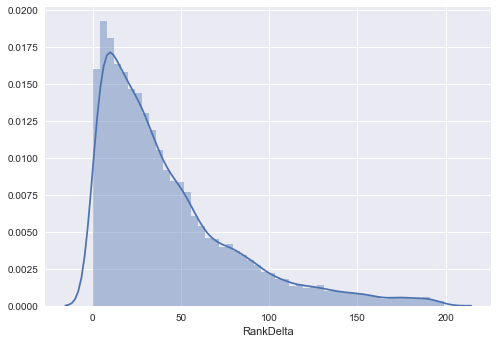

In [12]:
df[~ranks_predictor][[
    "Winner", "Loser",
    "WRank", "LRank",
    "RankDelta"
]]

deltas = df[~ranks_predictor]["RankDelta"].dropna()
sns.distplot(deltas[deltas < 200])
plt.show()

In [15]:
df2 = pd.DataFrame({
    "P1 % Win on Clay" : [],
    "P2 % Win on Clay" : [],
    "% Win P1 vs P2": [],
    "P1 Exhaustion": [],
    "P2 Exhaustion": []
})
df2.head()

,% Win P1 vs P2,P1 % Win on Clay,P1 Exhaustion,P2 % Win on Clay,P2 Exhaustion
